In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
## Applied Statistics - Turma 9DTS
### Projeto Integrado Parte 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from itertools import combinations
import math

In [10]:
# Importar a base de dados
df=pd.read_csv('/content/drive/MyDrive/FIAP/Estatistica Avançada/Applied Statistics Projeto Integrado 2/Base_ScoreCredito_QuantumFinance.csv', sep=';', decimal=',', encoding='utf-8')

# Visualizar os dados
df.head(10)

# Verificar os formatos das variáveis
#df.info()

,id,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
0,708082083,45,F,casado,graduacao,3,40,1,40.089665,3,0,0,1,1,778.0
1,708083283,58,M,solteiro,ensino fundam,0,44,1,66.557645,3,0,0,1,0,276.3
2,708084558,46,M,divorciado,doutorado,3,35,1,123.681821,6,0,0,1,1,401.0
3,708085458,34,F,solteiro,mestrado,0,22,1,19.715934,6,0,0,1,0,347.4
4,708086958,49,F,casado,mestrado,2,36,0,0.000000,3,1,437,1,2,476.0
5,708095133,43,M,na,doutorado,4,32,1,182.752690,5,0,0,1,1,522.9
6,708098133,32,F,casado,ensino medio,0,18,1,15.906504,6,0,0,1,0,186.0
7,708099183,37,F,solteiro,graduacao,0,34,1,18.463941,4,0,0,1,0,377.1
8,708100533,55,F,solteiro,ensino fundam,0,33,1,24.812802,3,0,0,1,1,502.2
9,708103608,52,M,solteiro,graduacao,0,47,1,124.484506,1,1,1580,1,1,804.6


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10127 entries, 3407 to 8020
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10127 non-null  object 
 1   idade                10127 non-null  int64  
 2   sexo                 10127 non-null  object 
 3   estado_civil         10127 non-null  object 
 4   escola               10127 non-null  object 
 5   Qte_dependentes      10127 non-null  int64  
 6   tempo_ultimoservico  10127 non-null  int64  
 7   trabalha             10127 non-null  object 
 8   vl_salario_mil       10127 non-null  float64
 9   reg_moradia          10127 non-null  object 
 10  casa_propria         10127 non-null  object 
 11  vl_imovel_em_mil     10127 non-null  int64  
 12  Qte_cartoes          10127 non-null  int64  
 13  Qte_carros           10127 non-null  int64  
 14  SCORE_CREDITO        10127 non-null  float64
dtypes: float64(2), int64(6), object(7)
memo

In [11]:
# Pre-processing
# Mudar o formato da variável quantitativa em qualitativa
df['id']= df['id'].astype(str)
df['reg_moradia']= df['reg_moradia'].replace({1: 'A', 2: 'B',3: 'C',4: 'D',5: 'E',6: 'F'})
df['trabalha']= df['trabalha'].astype(str)
df['casa_propria']= df['casa_propria'].astype(str)

#Mudar preenchimento para colunas categoricas
df['sexo'] = df['sexo'].replace({'F': 'Feminino', 'M': 'Masculino'})
df['trabalha'] = df['trabalha'].replace({'0': 'Não', '1': 'Sim'})
df['casa_propria'] = df['casa_propria'].replace({'0': 'Não', '1': 'Sim'})

# Selecionar as variáveis quantitativas
var_num = ['idade','Qte_dependentes','tempo_ultimoservico','vl_salario_mil','vl_imovel_em_mil','Qte_cartoes','Qte_carros','SCORE_CREDITO']
# Selecionar as variáveis qualitativas
var_cat =['sexo','estado_civil','escola','trabalha','reg_moradia','casa_propria']

df = df.sort_values('reg_moradia',ascending=True)

# Visualizar os dados
df.head(10)

,id,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
3407,714600258,45,Masculino,casado,doutorado,2,34,Sim,96.466045,A,Sim,365,1,1,453.0
7289,771069033,56,Masculino,na,graduacao,1,48,Sim,124.378947,A,Sim,1408,1,1,762.0
7288,771067308,38,Feminino,solteiro,graduacao,0,24,Sim,66.325176,A,Sim,562,1,0,329.4
5678,719248158,52,Masculino,divorciado,graduacao,2,46,Sim,122.286974,A,Sim,1453,1,1,794.0
7827,779034708,60,Feminino,casado,doutorado,0,38,Sim,112.023007,A,Sim,494,1,1,570.0
744,709606158,37,Feminino,casado,ensino medio,2,28,Sim,21.894759,A,Sim,488,1,1,531.0
2954,713810658,44,Masculino,casado,ensino medio,3,36,Sim,112.628762,A,Sim,1315,1,1,692.0
3402,714586458,41,Feminino,divorciado,graduacao,1,40,Sim,40.982049,A,Sim,1638,1,1,803.0
7287,771062733,44,Feminino,solteiro,ensino medio,0,31,Sim,39.754214,A,Sim,1551,1,0,609.3
4954,717657333,43,Feminino,solteiro,ensino medio,0,33,Sim,22.617145,A,Sim,478,1,1,488.7


In [12]:
# Análise descritiva
df.describe().round(2)

,idade,Qte_dependentes,tempo_ultimoservico,vl_salario_mil,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
count,10127.00,10127.00,10127.00,10127.00,10127.0,10127.00,10127.00,10127.00
mean,46.33,1.55,34.13,70.21,209.0,1.08,0.62,469.50
std,8.02,1.49,8.22,55.57,378.5,0.33,0.57,133.81
min,26.00,0.00,7.00,0.00,0.0,1.00,0.00,162.00
25%,41.00,0.00,30.00,21.33,0.0,1.00,0.00,375.00
50%,46.00,1.00,34.00,66.49,0.0,1.00,1.00,449.60
75%,52.00,3.00,39.00,107.54,289.0,1.00,1.00,540.90
max,73.00,5.00,57.00,233.30,1800.0,4.00,2.00,979.65


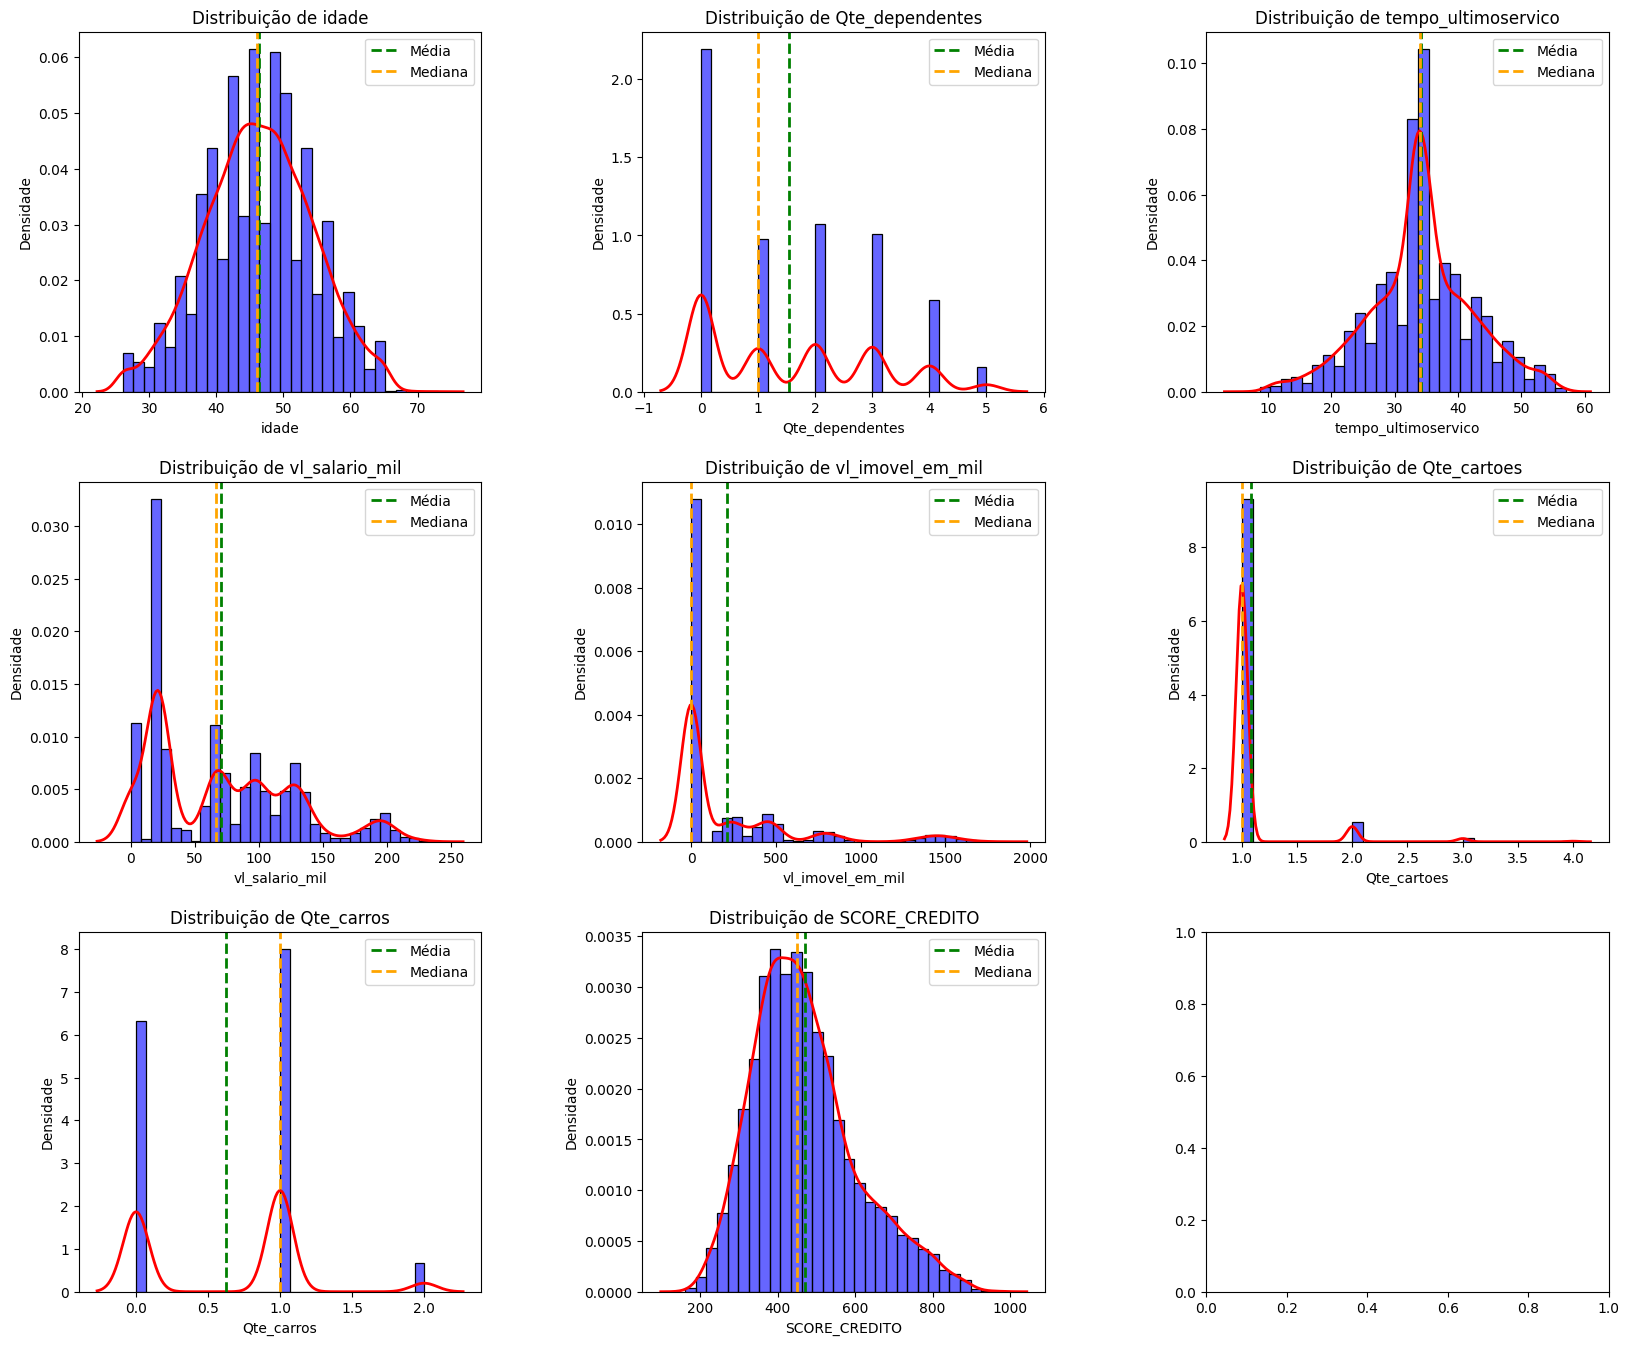

In [13]:
# Configuração dos subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

# Loop para criar histogramas, linhas de densidade, média e mediana
for col, ax in zip(var_num, axs.ravel()):
    # Histogramas
    sns.histplot(df[col], ax=ax, color="blue", bins=30, kde=False, stat="density", alpha=0.6)
    # Linha de densidade
    sns.kdeplot(df[col], ax=ax, color="red", lw=2)

    # Cálculo da média e mediana
    mean_value = df[col].mean()
    median_value = df[col].median()

    # Linhas de média e mediana
    ax.axvline(mean_value, color='green', linestyle='--', label='Média', lw=2)
    ax.axvline(median_value, color='orange', linestyle='--', label='Mediana', lw=2)

    # Títulos e rótulos
    ax.set_title(f'Distribuição de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Densidade')
    ax.legend()

# Ajustes de layout
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.4)
plt.show()


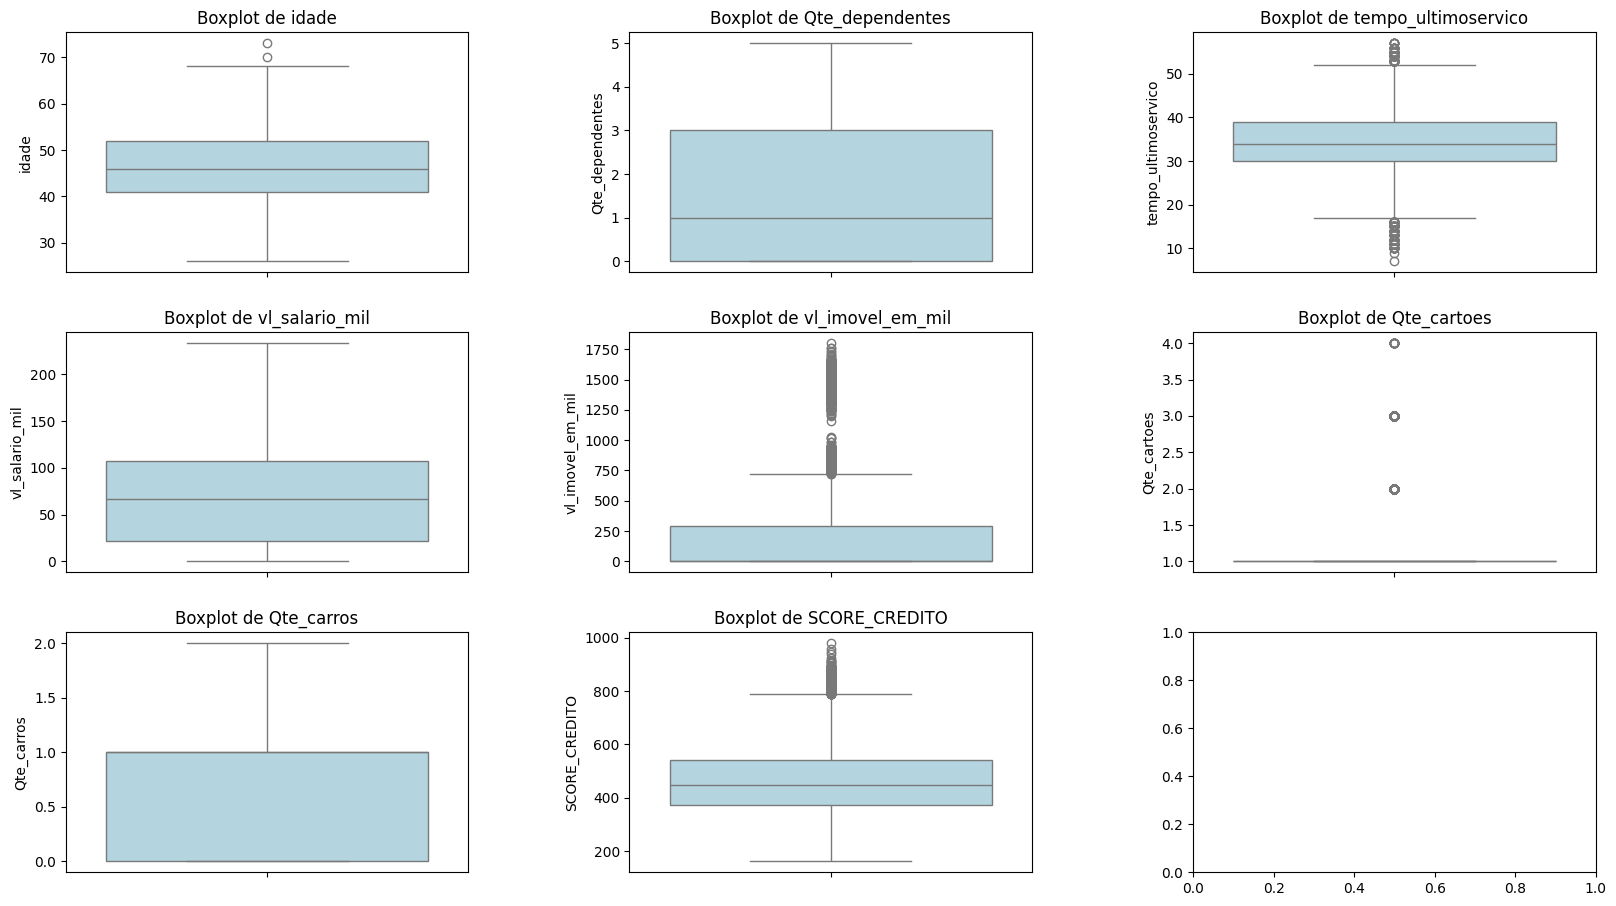

In [14]:
# Configuração dos subplots para boxplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 10))

# Loop para criar boxplots
for col, ax in zip(var_num, axs.ravel()):
    # Boxplot
    sns.boxplot(data=df, y=col, ax=ax, color="lightblue")

    # Títulos e rótulos
    ax.set_title(f'Boxplot de {col}')
    ax.set_ylabel(col)

# Ajustes de layout
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.4)
plt.show()



Análise descritiva para sexo:
sexo
Feminino     5358
Masculino    4769
Name: count, dtype: int64
sexo
Feminino     0.529081
Masculino    0.470919
Name: proportion, dtype: float64


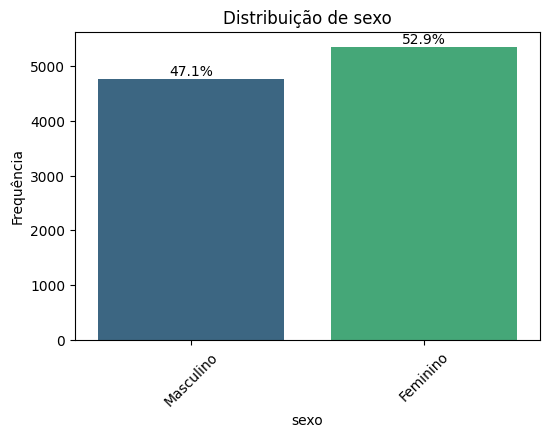


Análise descritiva para estado_civil:
estado_civil
casado        4687
solteiro      3943
na             749
divorciado     748
Name: count, dtype: int64
estado_civil
casado        0.462822
solteiro      0.389355
na            0.073961
divorciado    0.073862
Name: proportion, dtype: float64


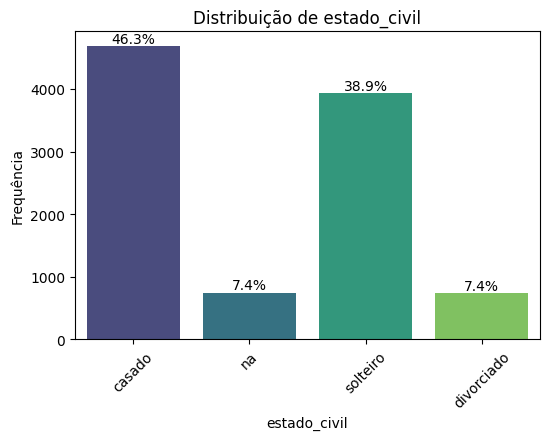


Análise descritiva para escola:
escola
ensino medio     3352
ensino fundam    2283
graduacao        2094
mestrado         1639
doutorado         759
Name: count, dtype: int64
escola
ensino medio     0.330996
ensino fundam    0.225437
graduacao        0.206774
mestrado         0.161845
doutorado        0.074948
Name: proportion, dtype: float64


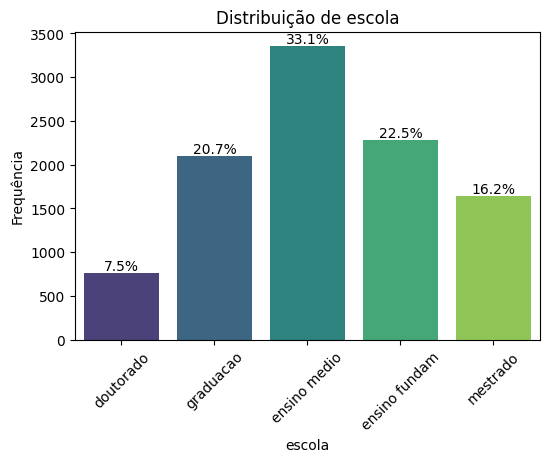


Análise descritiva para trabalha:
trabalha
Sim    9235
Não     892
Name: count, dtype: int64
trabalha
Sim    0.911919
Não    0.088081
Name: proportion, dtype: float64


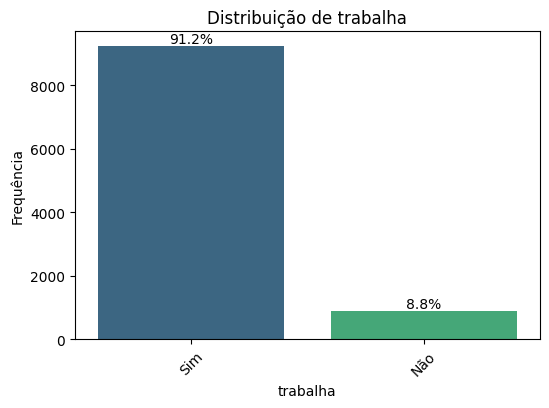


Análise descritiva para reg_moradia:
reg_moradia
C    2248
D    1923
E    1876
F    1851
B    1164
A    1065
Name: count, dtype: int64
reg_moradia
C    0.221981
D    0.189888
E    0.185247
F    0.182779
B    0.114940
A    0.105164
Name: proportion, dtype: float64


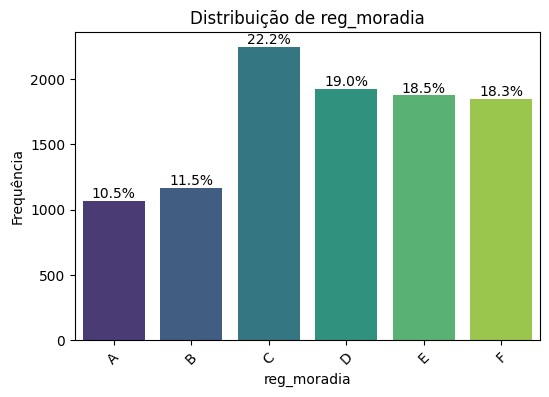


Análise descritiva para casa_propria:
casa_propria
Não    6558
Sim    3569
Name: count, dtype: int64
casa_propria
Não    0.647576
Sim    0.352424
Name: proportion, dtype: float64


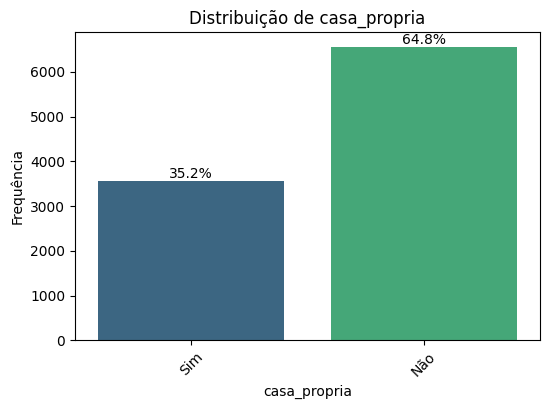

In [16]:
# Análise descritiva das variáveis categóricas
for col in var_cat:
    print(f'\nAnálise descritiva para {col}:')
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True))  # Frequência relativa

    # Gráfico de barras para cada variável categórica
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(data=df, x=df[col], palette='viridis', legend=False, hue=df[col])
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.xticks(rotation=45)

    # Adicionando os percentuais no gráfico
    total = len(df)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.show()


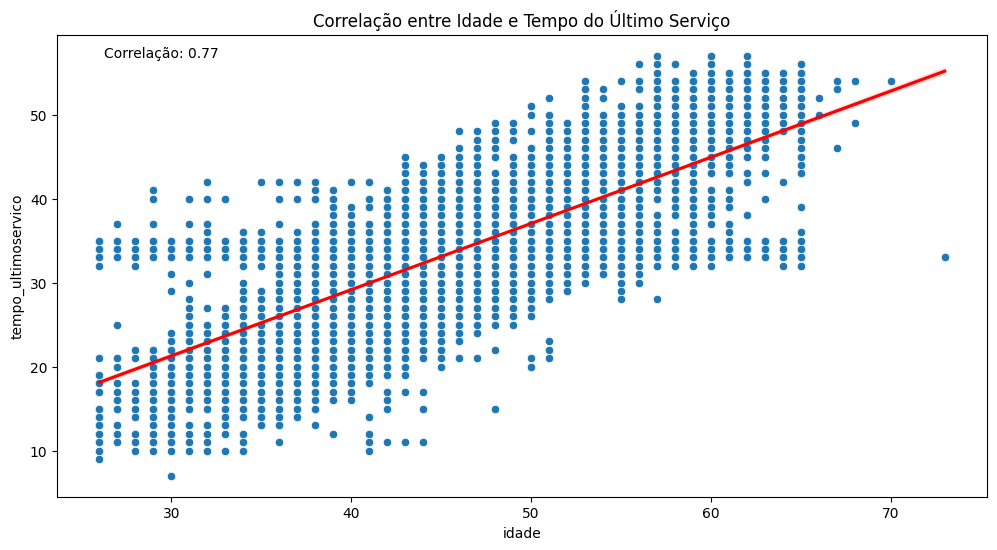

Correlação entre idade e tempo_ultimoservico: 0.7688


In [17]:
# Plotando a correlação entre "idade" e "tempo_ultimoservico"
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='idade', y='tempo_ultimoservico')
plt.title('Correlação entre Idade e Tempo do Último Serviço')
plt.xlabel('Idade')
plt.ylabel('Tempo do Último Serviço')

# Adicionando linha de regressão
sns.regplot(data=df, x='idade', y='tempo_ultimoservico', scatter=False, color='red')

# Calculando e exibindo o coeficiente de correlação
corr = df['idade'].corr(df['tempo_ultimoservico'])
plt.annotate(f'Correlação: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')

plt.show()

# Exibindo a correlação numérica
print(f"Correlação entre idade e tempo_ultimoservico: {corr:.4f}")




In [18]:
#Análise Bivariada e Teste Qui-quadrado
def bivariate_analysis(df, var1, var2):
    # Tabela de frequência bivariada
    tab_frequencia_bivariada = pd.crosstab(df[var1], df[var2])

    # Fazer teste Qui-Quadrado
    chi2, p_value, dof, expected = chi2_contingency(tab_frequencia_bivariada)

    print(f"Análise Bivariada: {var1} vs {var2}")
    print("Tabela de frequência bivariada:")
    print(tab_frequencia_bivariada)
    print("\nResultados do teste Qui-quadrado:")
    print(f"Qui-quadrado estatística: {chi2:.4f}")
    print(f"p-value: {p_value:.6f}")
    print(f"Graus de liberdade: {dof}")
    print("-----------------------------\n")

# Fazer análise bivariada para todos os pares de variáveis
for i in range(len(var_cat)):
    for j in range(i+1, len(var_cat)):
        bivariate_analysis(df, var_cat[i], var_cat[j])

Análise Bivariada: sexo vs estado_civil
Tabela de frequência bivariada:
estado_civil  casado  divorciado   na  solteiro
sexo                                           
Feminino        2451         402  380      2125
Masculino       2236         346  369      1818

Resultados do teste Qui-quadrado:
Qui-quadrado estatística: 3.8754
p-value: 0.275238
Graus de liberdade: 3
-----------------------------

Análise Bivariada: sexo vs escola
Tabela de frequência bivariada:
escola     doutorado  ensino fundam  ensino medio  graduacao  mestrado
sexo                                                                  
Feminino         213           1425          1848       1028       844
Masculino        546            858          1504       1066       795

Resultados do teste Qui-quadrado:
Qui-quadrado estatística: 291.1028
p-value: 0.000000
Graus de liberdade: 4
-----------------------------

Análise Bivariada: sexo vs trabalha
Tabela de frequência bivariada:
trabalha   Não   Sim
sexo             

In [ ]:
#Gráficos 100% Empilhados
def plot_100_stacked(df, x, y, title, order=None):
    # Reordenar as colunas se uma ordem for especificada
    if order:
        df = df.reindex(columns=order)

    # Criar o gráfico
    ax = df.plot(kind='bar', stacked=True, figsize=(10, 6))

    # Converter para porcentagem
    totals = df.sum(axis=1)
    for i, total in enumerate(totals):
        for c in ax.containers:
            h = c.patches[i].get_height()
            ax.annotate(f'{h/total:.1%}',
                        (c.patches[i].get_x() + c.patches[i].get_width()/2,
                         c.patches[i].get_y() + h/2),
                        ha='center', va='center')

    # Customizar o gráfico
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel('Porcentagem')
    plt.legend(title=y, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# 1. Região de moradia e propriedade da casa
tab1 = pd.crosstab(df['reg_moradia'], df['casa_propria'], normalize='index')
plot_100_stacked(tab1, 'Região de Moradia', 'Casa Própria', 'Região de Moradia vs Casa Própria')

# 2. Sexo e situação de trabalho
tab2 = pd.crosstab(df['sexo'], df['trabalha'], normalize='index')
plot_100_stacked(tab2, 'Sexo', 'Trabalha', 'Sexo vs Situação de Trabalho')

# 3. Estado civil e propriedade da casa
tab3 = pd.crosstab(df['estado_civil'], df['casa_propria'], normalize='index')
plot_100_stacked(tab3, 'Estado Civil', 'Casa Própria', 'Estado Civil vs Casa Própria')

tab4 = pd.crosstab(df['sexo'], df['escola'], normalize='index')
escola_order = ['doutorado','mestrado','graduacao','ensino medio','ensino fundam']
plot_100_stacked(tab4, 'Sexo', 'Nível de Escolaridade', 'Sexo vs Nível de Escolaridade', order=escola_order)

# 5. Nível de escolaridade e situação de trabalho
tab5 = pd.crosstab(df['escola'], df['trabalha'], normalize='index')
plot_100_stacked(tab5, 'Nível de Escolaridade', 'Trabalha', 'Nível de Escolaridade vs Situação de Trabalho')

In [ ]:

def plot_scatter_matrix(df, variables, sample_size=1000):
    # Calcular a matriz de correlação
    corr = df[variables].corr()

    # Criar a figura e os subplots
    n = len(variables)
    fig, axes = plt.subplots(n, n, figsize=(n*3, n*3))
    fig.suptitle('Matriz de Dispersão com Correlação de Pearson', fontsize=16)

    # Dicionário para nomes mais descritivos das variáveis
    var_names = {
        'idade': 'Idade',
        'Qte_dependentes': 'Quantidade de Dependentes',
        'tempo_ultimoservico': 'Tempo no Último Serviço',
        'vl_salario_mil': 'Salário (em mil)',
        'vl_imovel_em_mil': 'Valor do Imóvel (em mil)',
        'Qte_cartoes': 'Quantidade de Cartões',
        'Qte_carros': 'Quantidade de Carros',
        'SCORE_CREDITO': 'Score de Crédito'
    }

    # Iterar sobre todas as combinações de variáveis
    for i, var1 in enumerate(variables):
        for j, var2 in enumerate(variables):
            ax = axes[i, j]

            if i != j:
                # Gráfico de dispersão
                sns.scatterplot(data=df, x=var1, y=var2, ax=ax)

                # Adicionar linha de regressão
                sns.regplot(data=df, x=var1, y=var2, ax=ax, scatter=False, color='red')

                # Adicionar correlação de Pearson
                corr_val = corr.loc[var1, var2]
                ax.annotate(f'r = {corr_val:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
                            fontsize=10, ha='left', va='top')
            else:
                # Histograma na diagonal
                sns.histplot(data=df, x=var1, ax=ax, kde=True)

            # Ajustar rótulos com nomes mais descritivos
            ax.set_xlabel(var_names[var1], fontsize=8)
            ax.set_ylabel(var_names[var2], fontsize=8)

            # Rotacionar rótulos do eixo x para melhor legibilidade
            plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

            # Remover títulos dos subplots
            ax.set_title('')

    plt.tight_layout()
    plt.show()

# Chamar a função para criar a matriz de dispersão
plot_scatter_matrix(df, var_num)

In [ ]:

# Assumindo que 'df' é seu DataFrame e 'var_num' é sua lista de variáveis numéricas
var_num_selecionadas = ['idade', 'Qte_dependentes', 'tempo_ultimoservico', 'vl_salario_mil',
           'vl_imovel_em_mil', 'Qte_carros', 'SCORE_CREDITO']

##MANTER ISSO ABAIXO
# Análise de correlação de Pearson
def analise_correlacao_pearson(df):
    corr_matrix = df[var_num_selecionadas].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title('Matriz de Correlação de Pearson')
    plt.show()

analise_correlacao_pearson(df)
